### Numeric Prediction

In this section, we will be predicting the popularity score of a song, then converting it into a category (i.e. score of 0-9 has a category of 0, score of 10-19 has a category of 1), and using the appropriate metrics to compare against the actual song popularity category. 

We will be looking at the following models of Numeric Prediction:
1. Multi-variate Linear Regression 
2. Stepwise Regression 
3. SVM Regression ( Support Vector Machine )
4. KNN Based Regression ( K-Nearest Neighbours )

In [62]:
#Importing necessary libraries and Csv file
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
songpopDF = pd.read_csv('song_data_prepared.csv')
songpopDF=songpopDF.drop(songpopDF.columns[[0]], axis=1)
songpopDF

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Cs/Df,D,Ds/Ef,E,F,Fs/Gf,G,Gs/Af,A,As/Bf
0,73,1.164182,-0.905690,-0.915688,0.128954,-0.337292,-1.037342,0.976268,-0.838997,1.686888,...,0,0,0,0,0,0,0,1,0,0
1,66,0.070551,-0.888363,-0.600779,0.983086,-0.352820,-0.493469,0.174993,-0.399522,-0.560381,...,0,0,1,0,0,0,0,0,0,0
2,74,0.070551,-0.830004,-1.223751,1.567491,1.522136,-0.559930,0.684108,0.832732,0.064595,...,0,0,0,0,0,0,0,0,0,0
3,56,0.236595,-0.922241,-1.251135,0.548528,-0.352820,-0.438085,0.640093,-0.798065,1.866912,...,0,0,0,0,0,0,0,0,0,1
4,80,0.527274,-0.893257,-2.147940,1.442618,-0.351843,2.696662,1.297194,1.198961,2.518505,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55,-2.394959,2.329374,-1.778264,-2.598273,-0.213915,-0.583192,-2.292950,-0.539551,0.924066,...,0,0,0,0,0,0,1,0,0,0
9077,62,-0.455235,0.506098,0.097497,-0.665238,-0.352820,-0.659622,-0.259263,-0.658036,-0.898177,...,0,0,0,1,0,0,0,0,0,0
9078,60,-0.200857,1.847275,-0.922534,-2.473400,-0.352118,-0.526700,-2.483565,-0.823917,-0.959264,...,0,0,0,0,0,0,0,0,0,0
9079,23,-0.765859,2.144509,0.610935,-1.654232,-0.352820,-0.305163,-1.840326,-0.707585,0.358758,...,0,0,0,0,0,0,0,0,0,0


### Import train test split
We import the train test split from the Data Preparation output csv file and create copies for the different regression models.

In [63]:
# first seperating the dataframe into a df containing only predicted variables and a df only containing response variable
x_train= pd.read_csv('x_train.csv')
x_train=x_train.drop(x_train.columns[[0]], axis=1)
x_test= pd.read_csv('x_test.csv')
x_test=x_test.drop(x_test.columns[[0]], axis=1)
y_train= pd.read_csv('y_train.csv')
y_train=y_train.drop(y_train.columns[[0]], axis=1)
y_test= pd.read_csv('y_test.csv')
y_test=y_test.drop(y_test.columns[[0]], axis=1)

# we will be creating a copy of x_train, x_test, y_train, y_test, so that we can use the same data points for all the different models of regression. This will enable us to compare the models easily.
# Multivariate 
x_trainMV = x_train.copy()
x_testMV = x_test.copy()
y_trainMV = y_train.copy()
y_testMV = y_test.copy()

# Stepwise 
x_trainSW = x_train.copy()
x_testSW = x_test.copy()
y_trainSW = y_train.copy()
y_testSW = y_test.copy()

# SVR
x_trainSVR = x_train.copy()
x_testSVR = x_test.copy()
y_trainSVR = y_train.copy()
y_testSVR = y_test.copy()

#KNN
x_trainKNN = x_train.copy()
x_testKNN = x_test.copy()
y_trainKNN = y_train.copy()
y_testKNN = y_test.copy()

### Multi-Variate Linear Regression 
Multi-variate Linear Regression is an extension of simple linear regression, where multiple independent vairables ( predictor variable ) are used to predict the dependent variable ( response variable )

In [64]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression 
linreg = LinearRegression()

In [65]:
# fitting the model 
linreg.fit(x_trainMV,y_trainMV)

LinearRegression()

In [66]:
# Now that our machine has learnt, let us test how much it has learnt 
# testing on test data 
# predicted_yMV is a dataframe that will store the predicted values 
predicted_yMV = pd.DataFrame(linreg.predict(x_testMV),columns=['Predicted Values'])
predicted_yMV

,Predicted Values
0,49.393335
1,53.850606
2,42.500111
3,50.160730
4,46.247267
...,...
1812,47.381110
1813,45.418417
1814,48.166653
1815,55.798536


### Categorising the predicted values
Now we will assign these values to their respective categories where by

0 <= x < 25 is category 0

25 <= x < 50 is category 1 and so on 

we will define a function as we will be doing this for all the regression models coming up.

In [67]:
def categorize_popularity(score):
    if score>=75:
        return '3'
    elif score>=50:
        return '2'
    elif score>=25:
        return '1'
    elif score>=0:
        return '0'

In [68]:
# Categorising predicted values 
predicted_yMV['Predicted Values cat'] = predicted_yMV['Predicted Values'].apply(categorize_popularity)

#categorising y_test values 
y_testMV['Song Popularity cat'] = y_testMV['song_popularity'].apply(categorize_popularity)

# dropping the numerical values from test 
y_testMV.drop(columns=['song_popularity'],inplace=True)
y_testMV.reset_index(inplace=True)
y_testMV.drop(columns=['index'],inplace=True)

#dropping numerical values from precited values
predicted_yMV.drop(columns=['Predicted Values'],inplace=True)
predicted_yMV.reset_index(inplace=True)
predicted_yMV.drop(columns=['index'],inplace=True)

In [69]:
y_testMV

,Song Popularity cat
0,1
1,2
2,2
3,0
4,0
...,...
1812,0
1813,2
1814,2
1815,2


In [70]:
predicted_yMV

,Predicted Values cat
0,1
1,2
2,1
3,2
4,1
...,...
1812,1
1813,1
1814,1
1815,2


In [71]:
# let us now check the accuracy of categorisation 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_testMV['Song Popularity cat'],predicted_yMV['Predicted Values cat'])

print(" The accuracy for mutli-variate linear regression is: \n",accuracy)

 The accuracy for mutli-variate linear regression is: 
 0.4204733076499725


TPR:  [0.         0.52030948 0.55493274 0.        ]
TNR:  [1.         0.56923077 0.46702703 1.        ]
FPR:  [0.         0.43076923 0.53297297 0.        ]
FNR:  [1.         0.47969052 0.44506726 1.        ]
Accuracy:  [0.86626307 0.55531095 0.51018162 0.90919097]


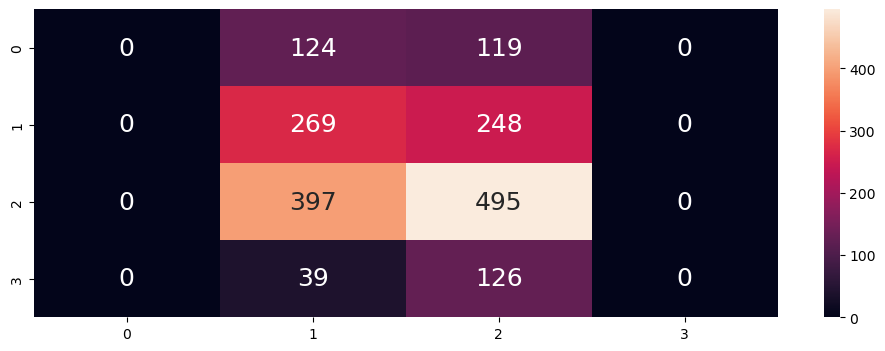

In [72]:
#Visualise Confusion matrix and model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM1=confusion_matrix(y_testMV, predicted_yMV)
sb.heatmap(CM1, annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPLR = CM1.sum(axis=0) - np.diag(CM1) 
FNLR = CM1.sum(axis=1) - np.diag(CM1)
TPLR = np.diag(CM1)
TNLR = CM1.sum() - (FPLR + FNLR + TPLR)
FPLR = FPLR.astype(float)
FNLR = FNLR.astype(float)
TPLR = TPLR.astype(float)
TNLR = TNLR.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRLR = TPLR/(TPLR+FNLR)
# Specificity or true negative rate
TNRLR = TNLR/(TNLR+FPLR) 
# Fall out or false positive rate
FPRLR= FPLR/(FPLR+TNLR)
# False negative rate
FNRLR = FNLR/(TPLR+FNLR)

#Accuracy
ACCLR = (TPLR+TNLR)/(TPLR+FPLR+FNLR+TNLR)

#Overall Accuracy
TOTALACCLR=accuracy_score(y_testMV,predicted_yMV)

print("TPR: ",TPRLR)
print("TNR: ",TNRLR)
print("FPR: ",FPRLR)
print("FNR: ",FNRLR)
print("Accuracy: ",ACCLR)

### Stepwise Regression 
Stepwise regression automatically selects the most important variables for the response variable for model.

There are two ways of finding the important variables 
1. Sequential Backward Selection - in which the features ( predictor variables ) are sequentially removed from a full candidate set until the removal of further features increase the criterion 
2. Sequential Forward Selection - in which the features ( predictor variables ) are sequentially added to an empty candidate set until the addition of further features does not decrease the criterion

WE WILL BE USING SEQUENTIAL BACKWARD SELECTION.

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector
# mlxtend library is not an in-built library. We had to download it seperately using pip install mlxtend command in the command prompt

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#sequential Backward selection
sbs = SequentialFeatureSelector(lr,
           k_features = 5,  # selecting the number of important variables we want it to find
           forward=False,   # backward selection
           floating=False, # not using floating search
           verbose=2,
           scoring='r2',
           cv=5)

sbs = sbs.fit(x_trainSW, y_trainSW)

print("Selected features:", sbs.k_feature_names_)
print("Final R-squared value:", sbs.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished

[2023-04-02 00:30:55] Features: 24/5 -- score: 0.029279788172631948[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s finished

[2023-04-02 00:30:56] Features: 23/5 -- score: 0.02954434756939801[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2023-04-02 00:30:57] Features: 22/5 -- score: 0.0297205947295859[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

Selected features: ('acousticness', 'danceability', 'energy', 'loudness', 'audio_valence')
Final R-squared value: 0.028737000460716543


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-04-02 00:31:02] Features: 6/5 -- score: 0.02928938201491531[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-04-02 00:31:02] Features: 5/5 -- score: 0.028737000460716543

According to the feature selection function that we just exectued, the variables which are supposed to help predict the response variable better are :
1. acousticness
2. danceability 
3. energy 
4. loudness
5. audio valence 

In [74]:
# predictor is a dataframe containing only the selected variables 
x_trainSW = x_trainSW[['acousticness', 'danceability', 'energy', 'loudness', 'audio_valence']]
x_testSW = x_testSW[['acousticness', 'danceability', 'energy', 'loudness', 'audio_valence']]

#training on train dataset
linreg.fit(x_trainSW,y_trainSW)

LinearRegression()

In [75]:
predicted_ySW = pd.DataFrame(linreg.predict(x_testSW),columns=['Predicted Values'])

In [76]:
# Categorising predicted values 
predicted_ySW['Predicted Values cat'] = predicted_ySW['Predicted Values'].apply(categorize_popularity)

#categorising y_test values 
y_testSW['Song Popularity cat'] = y_testSW['song_popularity'].apply(categorize_popularity)

# dropping the numerical values from test 
y_testSW.drop(columns=['song_popularity'],inplace=True)
y_testSW.reset_index(inplace=True)
y_testSW.drop(columns=['index'],inplace=True)

#dropping numerical values from precited values
predicted_ySW.drop(columns=['Predicted Values'],inplace=True)
predicted_ySW.reset_index(inplace=True)
predicted_ySW.drop(columns=['index'],inplace=True)

In [77]:
y_testSW

,Song Popularity cat
0,1
1,2
2,2
3,0
4,0
...,...
1812,0
1813,2
1814,2
1815,2


In [78]:
predicted_ySW

,Predicted Values cat
0,1
1,2
2,1
3,2
4,1
...,...
1812,1
1813,1
1814,1
1815,2


In [79]:
# let us now check the accuracy of categorisation 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_testSW['Song Popularity cat'],predicted_ySW['Predicted Values cat'])

print(" The accuracy for step-wise regression is: \n",accuracy)

 The accuracy for step-wise regression is: 
 0.42267473858007704


TPR:  [0.         0.52224371 0.55829596 0.        ]
TNR:  [1.         0.57153846 0.46810811 1.        ]
FPR:  [0.         0.42846154 0.53189189 0.        ]
FNR:  [1.         0.47775629 0.44170404 1.        ]
Accuracy:  [0.86626307 0.55751238 0.51238305 0.90919097]


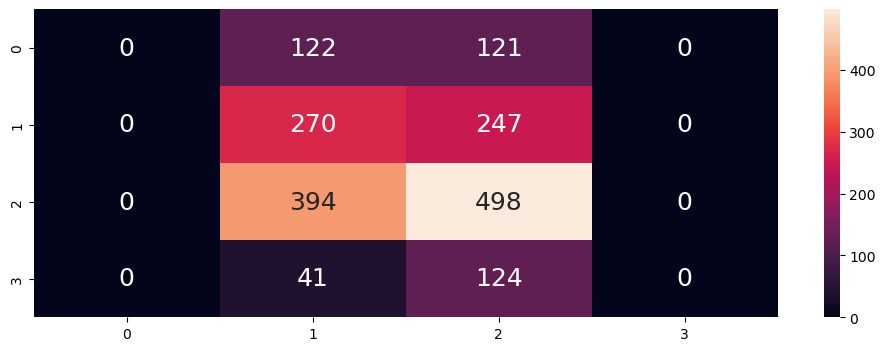

In [80]:
# visualise confusion matrix and model accuracy 
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM1=confusion_matrix(y_testSW, predicted_ySW)
sb.heatmap(CM1, annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPSW = CM1.sum(axis=0) - np.diag(CM1) 
FNSW = CM1.sum(axis=1) - np.diag(CM1)
TPSW = np.diag(CM1)
TNSW = CM1.sum() - (FPSW + FNSW + TPSW)
FPSW = FPSW.astype(float)
FNSW = FNSW.astype(float)
TPSW = TPSW.astype(float)
TNSW = TNSW.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRSW = TPSW/(TPSW+FNSW)
# Specificity or true negative rate
TNRSW = TNSW/(TNSW+FPSW) 
# Fall out or false positive rate
FPRSW= FPSW/(FPSW+TNSW)
# False negative rate
FNRSW = FNSW/(TPSW+FNSW)

#Accuracy
ACCSW = (TPSW+TNSW)/(TPSW+FPSW+FNSW+TNSW)

#Overall Accuracy
TOTALACCSW=accuracy_score(y_testSW,predicted_ySW)

print("TPR: ",TPRSW)
print("TNR: ",TNRSW)
print("FPR: ",FPRSW)
print("FNR: ",FNRSW)
print("Accuracy: ",ACCSW)

### Support Vector Regression 

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. 

In [81]:
# importing the necessary libraries 
from sklearn.svm import SVR 

# fitting the model 
regressor = SVR(kernel = 'rbf')
regressor.fit(x_trainSVR,y_trainSVR['song_popularity'])

SVR()

In [82]:
# testing on test data 
# predicted_ySVR is a dateframe that has values that the machine predicts using the model it just learned
predicted_ySVR = pd.DataFrame(regressor.predict(x_testSVR),columns=['Predicted Values'])

# Categorising predicted values 
predicted_ySVR['Predicted Values cat'] = predicted_ySVR['Predicted Values'].apply(categorize_popularity)

#categorising y_test values 
y_testSVR['Song Popularity cat'] = y_testSVR['song_popularity'].apply(categorize_popularity)

# dropping the numerical values from test 
y_testSVR.drop(columns=['song_popularity'],inplace=True)
y_testSVR.reset_index(inplace=True)
y_testSVR.drop(columns=['index'],inplace=True)

#dropping numerical values from precited values
predicted_ySVR.drop(columns=['Predicted Values'],inplace=True)
predicted_ySVR.reset_index(inplace=True)
predicted_ySVR.drop(columns=['index'],inplace=True)

In [83]:
y_testSVR

,Song Popularity cat
0,1
1,2
2,2
3,0
4,0
...,...
1812,0
1813,2
1814,2
1815,2


In [84]:
predicted_ySVR

,Predicted Values cat
0,2
1,2
2,1
3,2
4,1
...,...
1812,2
1813,1
1814,1
1815,2


In [85]:
# let us now check the accuracy of categorisation 

accuracy = accuracy_score(y_testSVR['Song Popularity cat'],predicted_ySVR['Predicted Values cat'])

print(" The accuracy for Support Vector Machine Regression is: \n",accuracy)

 The accuracy for Support Vector Machine Regression is: 
 0.49201981287837093


TPR:  [0.         0.28626692 0.83632287 0.        ]
TNR:  [1.         0.83846154 0.22918919 1.        ]
FPR:  [0.         0.16153846 0.77081081 0.        ]
FNR:  [1.         0.71373308 0.16367713 1.        ]
Accuracy:  [0.86626307 0.68134287 0.52724271 0.90919097]


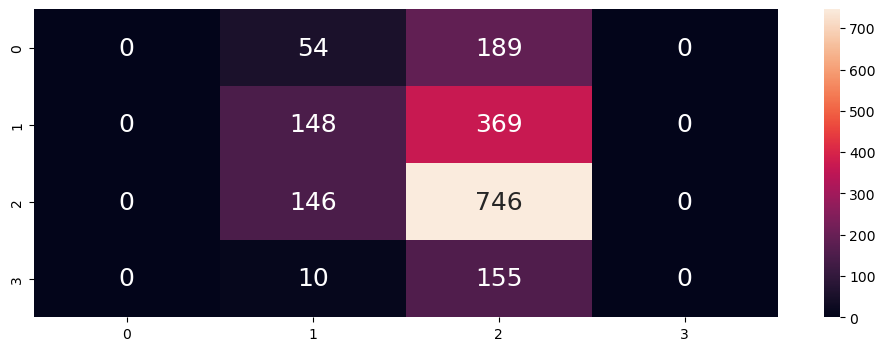

In [86]:
# visualise confusion matrix and model accuracy 
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM1=confusion_matrix(y_testSVR, predicted_ySVR)
sb.heatmap(CM1, annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPSVR = CM1.sum(axis=0) - np.diag(CM1) 
FNSVR = CM1.sum(axis=1) - np.diag(CM1)
TPSVR = np.diag(CM1)
TNSVR = CM1.sum() - (FPSVR + FNSVR + TPSVR)
FPSVR = FPSVR.astype(float)
FNSVR = FNSVR.astype(float)
TPSVR = TPSVR.astype(float)
TNSVR = TNSVR.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRSVR = TPSVR/(TPSVR+FNSVR)
# Specificity or true negative rate
TNRSVR = TNSVR/(TNSVR+FPSVR) 
# Fall out or false positive rate
FPRSVR= FPSVR/(FPSVR+TNSVR)
# False negative rate
FNRSVR = FNSVR/(TPSVR+FNSVR)

#Accuracy
ACCSVR = (TPSVR+TNSVR)/(TPSVR+FPSVR+FNSVR+TNSVR)

#Overall Accuracy
TOTALACCSVR=accuracy_score(y_testSVR,predicted_ySVR)

print("TPR: ",TPRSVR)
print("TNR: ",TNRSVR)
print("FPR: ",FPRSVR)
print("FNR: ",FNRSVR)
print("Accuracy: ",ACCSVR)

### K-Nearest Neighbors Regression 

The K-Nearest Neighbors algorithm works by getting a gievn point and evaluating its "k" neighbors to find similarities. 
The idea is built from the fact that similar data points will be closer in the space than the points that are very different from each other. 

The K-Nearest Neighbors Regression algorithm will calculate the regression for the dataset and then takes the number of neighbors we input and check the results with that number chosen and average the results, giving us an estimated result

In [87]:
# importing necessary library 
from sklearn.neighbors import KNeighborsRegressor 

knn_model = KNeighborsRegressor(n_neighbors=5).fit(x_trainKNN,y_trainKNN)

score_knn = knn_model.score(x_trainKNN,y_trainKNN)

In [88]:
# testing on test data 
# predicted_ySVR is a dateframe that has values that the machine predicts using the model it just learned
predicted_yKNN = pd.DataFrame(knn_model.predict(x_testKNN),columns=['Predicted Values'])

# Categorising predicted values 
predicted_yKNN['Predicted Values cat'] = predicted_yKNN['Predicted Values'].apply(categorize_popularity)

#categorising y_test values 
y_testKNN['Song Popularity cat'] = y_testKNN['song_popularity'].apply(categorize_popularity)

# dropping the numerical values from test 
y_testKNN.drop(columns=['song_popularity'],inplace=True)
y_testKNN.reset_index(inplace=True)
y_testKNN.drop(columns=['index'],inplace=True)

#dropping numerical values from precited values
predicted_yKNN.drop(columns=['Predicted Values'],inplace=True)
predicted_yKNN.reset_index(inplace=True)
predicted_yKNN.drop(columns=['index'],inplace=True)

In [89]:
y_testKNN

,Song Popularity cat
0,1
1,2
2,2
3,0
4,0
...,...
1812,0
1813,2
1814,2
1815,2


In [90]:
predicted_yKNN

,Predicted Values cat
0,1
1,2
2,1
3,0
4,1
...,...
1812,1
1813,2
1814,2
1815,2


In [91]:
# let us now check the accuracy of categorisation 

accuracy = accuracy_score(y_testKNN['Song Popularity cat'],predicted_yKNN['Predicted Values cat'])

print(" The accuracy for k-nearest neighbour based regression model is: \n",accuracy)

 The accuracy for k-nearest neighbour based regression model is: 
 0.4006604292790314


TPR:  [0.01234568 0.46421663 0.54147982 0.01212121]
TNR:  [0.98611987 0.54428463 0.46544276 0.99637462]
FPR:  [0.00698856 0.44692308 0.53405405 0.00181598]
FNR:  [1.         0.50732601 0.45243363 1.        ]
Accuracy:  [0.86186021 0.52779307 0.50302697 0.90864062]


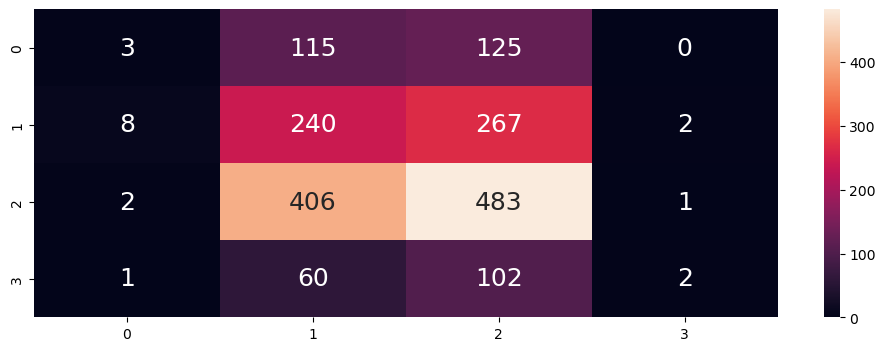

In [92]:
# visualise confusion matrix and model accuracy 
f, axes = plt.subplots(1,1,figsize=(12, 4))
CM1=confusion_matrix(y_testKNN, predicted_yKNN)
sb.heatmap(CM1, annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes)

FPKNN = CM1.sum(axis=0) - np.diag(CM1) 
FNKNN = CM1.sum(axis=1) - np.diag(CM1)
TPKNN = np.diag(CM1)
TNKNN = CM1.sum() - (FPKNN + FNKNN + TPKNN)
FPKNN = FPKNN.astype(float)
FNKNN = FNKNN.astype(float)
TPKNN = TPKNN.astype(float)
TNKNN = TNKNN.astype(float)
            
            
# Sensitivity, hit rate, recall, or true positive rate
TPRKNN = TPKNN/(TPKNN+FNKNN)
# Specificity or true negative rate
TNRKNN = TNKNN/(TNLR+FPKNN) 
# Fall out or false positive rate
FPRKNN= FPKNN/(FPKNN+TNKNN)
# False negative rate
FNRKNN = FNKNN/(TPLR+FNKNN)

#Accuracy
ACCKNN = (TPKNN+TNKNN)/(TPKNN+FPKNN+FNKNN+TNKNN)

#Overall Accuracy
TOTALACCKNN=accuracy_score(y_testKNN,predicted_yKNN)

print("TPR: ",TPRKNN)
print("TNR: ",TNRKNN)
print("FPR: ",FPRKNN)
print("FNR: ",FNRKNN)
print("Accuracy: ",ACCKNN)

In [93]:
#Convert all TPR,FNR,TNR,FPR,Accuracy,Overall Accuracy 
TPRLRdf=pd.DataFrame(TPRLR)
TPRSWdf=pd.DataFrame(TPRSW)
TPRSVRdf=pd.DataFrame(TPRSVR)
TPRKNNdf=pd.DataFrame(TPRKNN)

TPRCompiled = pd.merge(TPRLRdf, TPRSWdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRSVRdf, left_index=True, right_index=True)
TPRCompiled = pd.merge(TPRCompiled, TPRKNNdf, left_index=True, right_index=True)



FNRLRdf=pd.DataFrame(FNRLR)
FNRSWdf=pd.DataFrame(FNRSW)
FNRSVRdf=pd.DataFrame(FNRSVR)
FNRKNNdf=pd.DataFrame(FNRKNN)

FNRCompiled = pd.merge(FNRLRdf, FNRSWdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRSVRdf, left_index=True, right_index=True)
FNRCompiled = pd.merge(FNRCompiled, FNRKNNdf, left_index=True, right_index=True)



TNRLRdf=pd.DataFrame(TNRLR)
TNRSWdf=pd.DataFrame(TNRSW)
TNRSVRdf=pd.DataFrame(TNRSVR)
TNRKNNdf=pd.DataFrame(TNRKNN)

TNRCompiled = pd.merge(TNRLRdf, TNRSWdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRSVRdf, left_index=True, right_index=True)
TNRCompiled = pd.merge(TNRCompiled, TNRKNNdf, left_index=True, right_index=True)



FPRLRdf=pd.DataFrame(FPRLR)
FPRSWdf=pd.DataFrame(FPRSW)
FPRSVRdf=pd.DataFrame(FPRSVR)
FPRKNNdf=pd.DataFrame(FPRKNN)

FPRCompiled = pd.merge(FPRLRdf, FPRSWdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRSVRdf, left_index=True, right_index=True)
FPRCompiled = pd.merge(FPRCompiled, FPRKNNdf, left_index=True, right_index=True)



ACCLRdf=pd.DataFrame(ACCLR)
ACCSWdf=pd.DataFrame(ACCSW)
ACCSVRdf=pd.DataFrame(ACCSVR)
ACCKNNdf=pd.DataFrame(ACCKNN)

ACCCompiled = pd.merge(ACCLRdf, ACCSWdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCSVRdf, left_index=True, right_index=True)
ACCCompiled = pd.merge(ACCCompiled, ACCKNNdf, left_index=True, right_index=True)


#Create data for overall accuracy
data = {'Linear Regression':TOTALACCLR,'Stepwise Regression':TOTALACCSW, 'Support Vector Regression':TOTALACCSVR,'K-Nearest Neighbors':TOTALACCKNN
       }
ModelUsed = list(data.keys())
OAccuracy = list(data.values())

TPRCompiled.columns = ['Linear Regression','Stepwise Regression',  'Support Vector Regression', 'K-Nearest Neighbors']
FNRCompiled.columns = ['Linear Regression','Stepwise Regression',  'Support Vector Regression', 'K-Nearest Neighbors']
TNRCompiled.columns = ['Linear Regression','Stepwise Regression',  'Support Vector Regression', 'K-Nearest Neighbors']
FPRCompiled.columns = ['Linear Regression','Stepwise Regression',  'Support Vector Regression', 'K-Nearest Neighbors']
ACCCompiled.columns = ['Linear Regression','Stepwise Regression',  'Support Vector Regression', 'K-Nearest Neighbors']


C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_2368\1905399237.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  TPRCompiled = pd.merge(TPRCompiled, TPRKNNdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_2368\1905399237.py:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  FNRCompiled = pd.merge(FNRCompiled, FNRKNNdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_2368\1905399237.py:31: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  TNRCompiled = pd.merge(TNRCompiled, TNRKNNdf, left_index=True, right_index=True)
C:\Users\Qi Yang\AppData\Local\Temp\ipykernel_2368\1905399237.py:42: FutureWarning: Passing 'suffi

In [94]:
#Showcase overall Accuracy values for later use.
data

{'Linear Regression': 0.4204733076499725,
 'Stepwise Regression': 0.42267473858007704,
 'Support Vector Regression': 0.49201981287837093,
 'K-Nearest Neighbors': 0.4006604292790314}

### Extract results
We extract the results to a CSV file to be compared with Categorical Prediction results later.

In [95]:
TPRCompiled.to_csv("TPR_Num.csv")
FNRCompiled.to_csv("FNR_Num.csv")
TNRCompiled.to_csv("TNR_Num.csv")
FPRCompiled.to_csv("FPR_Num.csv")
ACCCompiled.to_csv("ACC_Num.csv")